# Motivation
I wanted to start my first Machine Learning project from a dataset that is real-world data, specifically my [Whoop](www.whoop.com) data since March.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1">Motivation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1">Imports</a></span></li><li><span><a href="#Data-reading" data-toc-modified-id="Data-reading-1.0.2">Data reading</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-1.0.3">Filtering</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.0.4">Data Cleaning</a></span></li><li><span><a href="#Inspecting-the-data" data-toc-modified-id="Inspecting-the-data-1.0.5">Inspecting the data</a></span></li><li><span><a href="#Basic-data-analysis" data-toc-modified-id="Basic-data-analysis-1.0.6">Basic data analysis</a></span></li></ul></li></ul></li></ul></div>

### Imports
Let's get the usual imports out of the way...

In [86]:
import pandas as pd # data processing, visualising the data
import numpy as np # linear algebra
import os

import seaborn as sns # visualisation
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

### Data reading

In [51]:
# read the data file (#TODO: move the data to a data directory)
initial_data = pd.read_csv("../../../Documents/whoop/2020-12-05 Habit Dash (flat file).csv")
# look at the data
initial_data.head(5)

,source,date,field,value
0,garmin,2019-10-08,garmin_stressdetails_stresslevel_avg,32.913907
1,garmin,2019-10-08,garmin_stressdetails_bodybattery_avg,63.006173
2,garmin,2019-10-08,garmin_dailies_averageheartrateinbeatsperminute,85.000000
3,garmin,2019-10-08,garmin_dailies_distanceinmeters,25487.000000
4,garmin,2019-10-08,garmin_dailies_moderateintensitydurationinseconds,2400.000000


In [52]:
# look at the end of the data
initial_data.tail(5)

,source,date,field,value
14593,whoop,2020-12-05,whoop_sleep_duration_rem_percent,19.656522
14594,whoop,2020-12-05,whoop_sleep_end_standardized,6.833333
14595,garmin,2020-12-05,garmin_dailies_highstressdurationinseconds,0.000000
14596,whoop,2020-12-05,whoop_sleep_respiratory_rate,17.168000
14597,garmin,2020-12-05,garmin_stressdetails_bodybattery_avg,80.379310


### Filtering
We can see there are two sources of data in this habitdash file, Whoop and Garmin. We'd like to filter the data only for the Whoop data, and also make the lables for 'field' a bit more meaningful.

In [53]:
whoop_data = initial_data.loc[initial_data['source'] == 'whoop'].copy(True)

Check the size of the dataset, as well as the shape and columns.

In [54]:
print(f"{whoop_data.shape[0]} rows in data set")
print(f"{whoop_data.shape[1]} columns in data set")


7488 rows in data set
4 columns in data set


In [55]:
whoop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7488 entries, 3124 to 14596
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  7488 non-null   object 
 1   date    7488 non-null   object 
 2   field   7488 non-null   object 
 3   value   7488 non-null   float64
dtypes: float64(1), object(3)
memory usage: 292.5+ KB


### Data Cleaning

We'd like to clean the data and structure it in a more input and response variable type problem. To do enable this, I will clean the data slightly to make the feature names more meaningful.

In [56]:
new_field_name_map = {nm: nm.replace("whoop_", "") for 
                      nm in whoop_data['field'].unique()}
# {'whoop_strain_avghr': 'strain_avghr',
#  'whoop_strain_calories': 'strain_calories', ... etc

whoop_data['field'] = whoop_data['field'].map(new_field_name_map)

whoop_data.drop('source', axis=1, inplace=True)
whoop_data['date'] = pd.to_datetime(whoop_data['date'])

In [63]:
data = whoop_data.pivot_table(index='date',
                              columns='field')

In [67]:
# visualised the pivoted data
data.head(5)

value                                                      \
field      nap_count nap_duration_total_asleep recovery_hrv recovery_rhr   
date                                                                       
2020-03-14       NaN                       NaN          NaN          NaN   
2020-03-15       1.0                  0.842217      44.6090         58.0   
2020-03-16       NaN                       NaN      67.5831         56.0   
2020-03-17       NaN                       NaN      69.1102         57.0   
2020-03-18       1.0                  1.068157      52.0228         61.0   

                                                                    \
field      recovery_score sleep_asleep_percent sleep_awake_percent   
date                                                                 
2020-03-14            NaN                  NaN                 NaN   
2020-03-15           36.0              89.6641             10.3359   
2020-03-16           55.0              90.4115              9.5885   
2020-03-17           54.0              89.3827             10.6173   
2020-03-18           35.0              82.1691             17.8309   

                                                                        ...  \
field      sleep_cycles sleep_disturbances sleep_disturbances_per_hour  ...   
date                                                                    ...   
2020-03-14          NaN                NaN                         NaN  ...   
2020-03-15          5.0               12.0                    1.593749  ...   
2020-03-16          3.0               13.0                    1.586741  ...   
2020-03-17          3.0               15.0                    1.833763  ...   
2020-03-18          2.0                5.0                    0.965233  ...   

                                                                             \
field      sleep_respiratory_rate sleep_score_consistency sleep_score_total   
date                                                                          
2020-03-14                    NaN                     NaN               NaN   
2020-03-15                16.9043                     NaN              77.0   
2020-03-16                16.8164                     NaN              93.0   
2020-03-17                16.9336                    72.0              85.0   
2020-03-18                17.0801                    70.0              48.0   

                                                                               \
field      sleep_start_standardized strain_avghr strain_calories strain_maxhr   
date                                                                            
2020-03-14                      NaN         84.0     1607.057839        161.0   
2020-03-15                -0.866667         71.0     2029.507648        168.0   
2020-03-16                -1.383333         75.0     2500.262906        172.0   
2020-03-17                -1.966667         75.0     2616.324092        169.0   
2020-03-18                 0.666667         77.0     2218.372371        184.0   

                                                        
field      strain_score workout_count workout_duration  
date                                                    
2020-03-14    12.160080           3.0            134.7  
2020-03-15     9.830382           2.0             82.0  
2020-03-16    13.633189           5.0             93.0  
2020-03-17    13.503018           1.0             39.0  
2020-03-18    13.688683           1.0             40.0  

[5 rows x 31 columns]

In [68]:
# rename the columns
data.columns = [x[1] for x in data.columns]

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-14 to 2020-12-05
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nap_count                     14 non-null     float64
 1   nap_duration_total_asleep     14 non-null     float64
 2   recovery_hrv                  260 non-null    float64
 3   recovery_rhr                  260 non-null    float64
 4   recovery_score                260 non-null    float64
 5   sleep_asleep_percent          260 non-null    float64
 6   sleep_awake_percent           260 non-null    float64
 7   sleep_cycles                  260 non-null    float64
 8   sleep_disturbances            260 non-null    float64
 9   sleep_disturbances_per_hour   260 non-null    float64
 10  sleep_duration_awake          260 non-null    float64
 11  sleep_duration_deep           260 non-null    float64
 12  sleep_duration_deep_percent   260 non-null   

### Inspecting the data

Whoop is a wearable that is mainly geared towards optimising the recovery of the wearer/user. In this case it would make sense for the target variable to be the 'recovery', therefore. This target is a continuous variable, indicated by the 'float' above.

In [74]:
data.describe()

,nap_count,nap_duration_total_asleep,recovery_hrv,recovery_rhr,recovery_score,sleep_asleep_percent,sleep_awake_percent,sleep_cycles,sleep_disturbances,sleep_disturbances_per_hour,...,sleep_respiratory_rate,sleep_score_consistency,sleep_score_total,sleep_start_standardized,strain_avghr,strain_calories,strain_maxhr,strain_score,workout_count,workout_duration
count,14.0,14.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,256.000000,260.000000,260.000000,262.000000,262.000000,262.000000,262.000000,218.000000,218.000000
mean,1.0,1.074529,78.877226,51.888462,59.065385,90.574697,9.425303,5.511538,11.996154,1.431719,...,16.679497,75.597656,86.876923,-1.364679,67.729008,2313.406020,165.851145,12.144594,1.761468,83.418807
std,0.0,0.370890,19.538579,3.246480,21.152680,3.566529,3.566529,1.647468,3.880948,0.424520,...,0.370727,8.467136,10.675643,0.886084,5.511312,367.785453,16.499297,3.470031,1.001373,50.445537
min,1.0,0.475380,44.001000,44.000000,11.000000,70.693100,2.099500,1.000000,2.000000,0.363784,...,15.527300,42.000000,33.000000,-2.666667,55.000000,1420.387189,105.000000,4.141509,1.000000,18.000000
25%,1.0,0.861068,65.680050,50.000000,42.750000,89.155725,7.014275,4.000000,10.000000,1.137477,...,16.406200,70.750000,81.000000,-1.916667,64.000000,2082.804732,159.000000,10.074466,1.000000,45.925000
50%,1.0,1.030319,74.405650,52.000000,58.000000,90.871650,9.128350,5.500000,12.000000,1.428821,...,16.669900,75.000000,88.000000,-1.550000,68.000000,2306.180688,171.500000,12.974269,1.000000,66.191667
75%,1.0,1.328571,90.280850,54.000000,74.250000,92.985725,10.844275,7.000000,15.000000,1.733104,...,16.933600,80.000000,95.000000,-1.075000,71.000000,2509.906788,178.000000,14.571316,2.000000,115.250000
max,1.0,1.708507,155.723000,65.000000,99.000000,97.900500,29.306900,9.000000,25.000000,2.798636,...,17.812500,94.000000,100.000000,4.466667,85.000000,4337.858509,195.000000,20.262546,7.000000,300.000000


Looking at a description of the statistics, the **recovery_score**, **strain_calories**, and **strain_maxhr** have high values for standard deviation, therefore we will need to do some scaling/normalisation of the data before we train the model.

In [75]:
# look for empty values
data.isnull().sum()

nap_count                       248
nap_duration_total_asleep       248
recovery_hrv                      2
recovery_rhr                      2
recovery_score                    2
sleep_asleep_percent              2
sleep_awake_percent               2
sleep_cycles                      2
sleep_disturbances                2
sleep_disturbances_per_hour       2
sleep_duration_awake              2
sleep_duration_deep               2
sleep_duration_deep_percent       2
sleep_duration_light              2
sleep_duration_light_percent      2
sleep_duration_rem                2
sleep_duration_rem_percent        2
sleep_duration_total_asleep       2
sleep_duration_total_inbed        2
sleep_end_standardized            2
sleep_latency                     2
sleep_respiratory_rate            2
sleep_score_consistency           6
sleep_score_total                 2
sleep_start_standardized          2
strain_avghr                      0
strain_calories                   0
strain_maxhr                

We can see from above that the data contains 30 features, not all of which are entirely useful, for example there are few observations for the nap features, so we may choose to drop these for the first analysis of the data.

In [76]:
data.drop(['nap_count', 'nap_duration_total_asleep'],
         axis=1, inplace=True)

### Basic data analysis
Let's get an idea of the data by visualising the features, firstly in a histogram.

In [89]:
params = {'axes.titlesize': '50',
          'xlabelsize': '20',
          'ylabelsize': '20'}

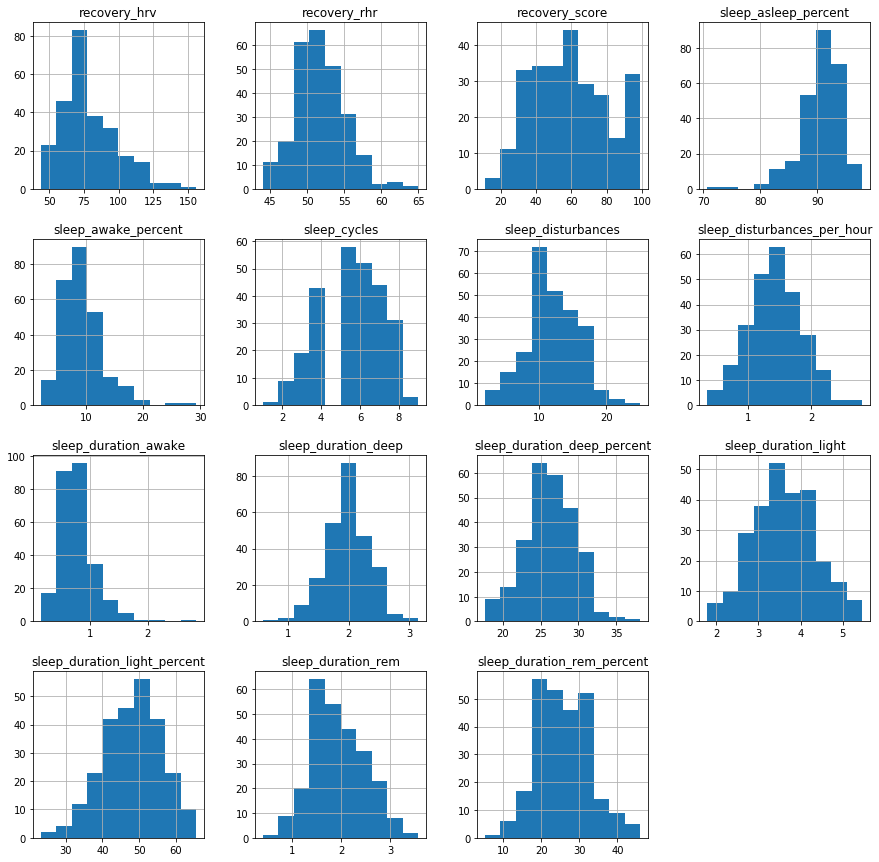

In [91]:
# there's lots of data, so split into two histograms
hist = data.iloc[:,:15].hist(bins=10,
                             figsize=(15,15))

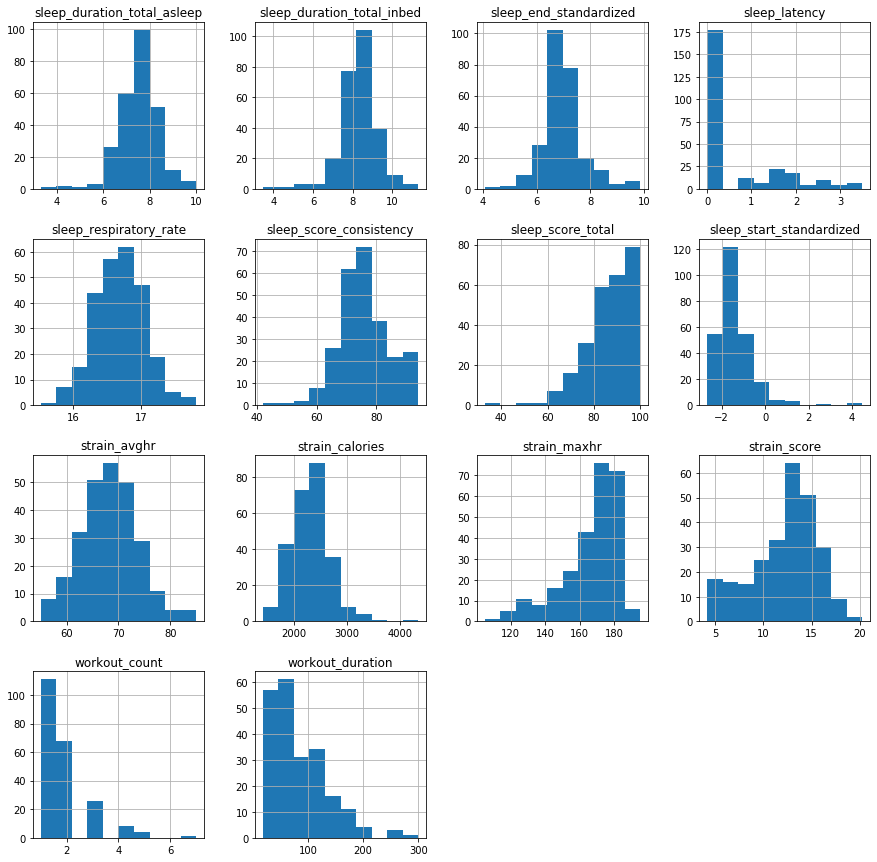

In [92]:
hist_two = data.iloc[:,15:].hist(bins=10,
                                 figsize=(15,15))

Observe that the discrete bars in the above histograms represent categorical variables, for example: **sleep cycles**, **workout count**.

**Is there any correlation between features?**
Understanding if there is any correlation between features will be useful for feature selection. if any features are very highly correlated, it will allow us to reduce the number of features in the dataset.

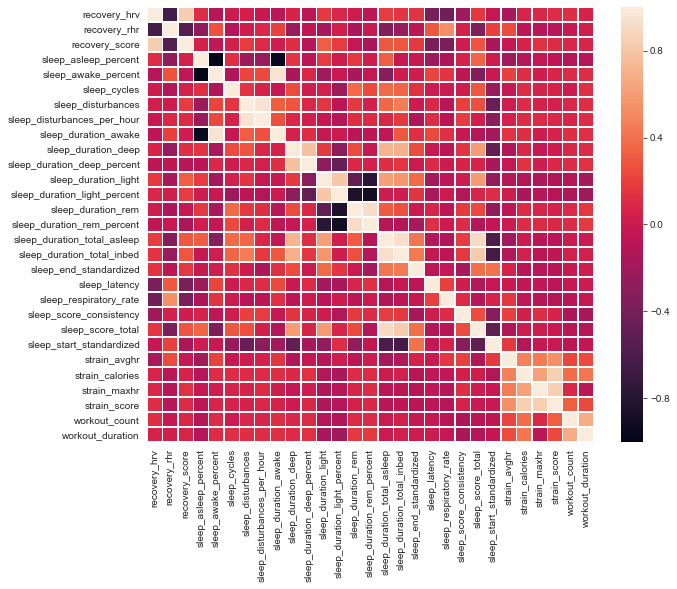

In [95]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=False, linewidths=0.3)
plt.show()

The results suggest there is not very tight correlation between features.

Let's investigate the output label, **recovery_score**

Text(0.5, 1.0, 'Histogram of Output Label (recovery_score)')

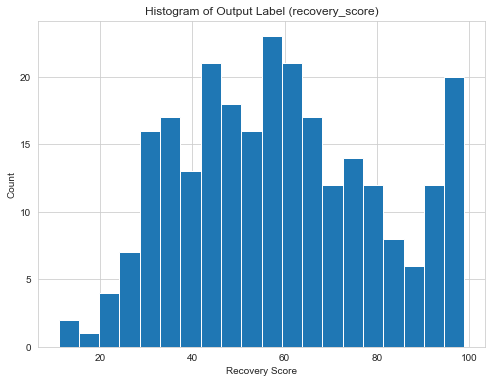

In [112]:
data['recovery_score'].hist(bins=20,
                           figsize=(8,6))
plt.xlabel("Recovery Score")
plt.ylabel("Count")
plt.title("Histogram of Output Label (recovery_score)")


The observation is that the data set is quite even for the output label.